<a href="https://colab.research.google.com/github/SuchitraShankar07/GenAI2026/blob/master/Customer_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Customer Review Sentiment Analyzer


In [1]:
from transformers import pipeline
from datasets import load_dataset
import matplotlib.pyplot as plt

### Load dataset

In [2]:
dataset = load_dataset("amazon_polarity", split="test[:50]")

print("Sample Review:\n")
print(dataset[0]["content"])
print("-" * 80)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Sample Review:

My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"
--------------------------------------------------------------------------------


### Load Sentiment Model

In [3]:
sentiment_analyzer = pipeline(    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)



Device set to use cpu


### Run Sentiment Analysis

In [4]:
texts = [
    str(text)
    for text in dataset["content"]
    if isinstance(text, str) and text.strip() != ""
]


In [5]:
results = sentiment_analyzer(
    texts,
    truncation=True,
    batch_size=8
)


### Predict!

In [6]:
positive = 0
negative = 0

print("\nSentiment Results:\n")

for i, result in enumerate(results):
    label = result["label"]
    score = result["score"]

    if label == "POSITIVE":
        positive += 1
    else:
        negative += 1

    print(f"Review {i+1}: {label} ({score:.2f})")


Sentiment Results:

Review 1: NEGATIVE (0.55)
Review 2: POSITIVE (1.00)
Review 3: NEGATIVE (1.00)
Review 4: NEGATIVE (0.98)
Review 5: POSITIVE (0.97)
Review 6: NEGATIVE (1.00)
Review 7: NEGATIVE (1.00)
Review 8: NEGATIVE (1.00)
Review 9: POSITIVE (1.00)
Review 10: POSITIVE (1.00)
Review 11: POSITIVE (1.00)
Review 12: POSITIVE (1.00)
Review 13: NEGATIVE (1.00)
Review 14: POSITIVE (1.00)
Review 15: NEGATIVE (1.00)
Review 16: NEGATIVE (1.00)
Review 17: POSITIVE (1.00)
Review 18: POSITIVE (1.00)
Review 19: NEGATIVE (0.96)
Review 20: POSITIVE (1.00)
Review 21: NEGATIVE (1.00)
Review 22: NEGATIVE (1.00)
Review 23: POSITIVE (1.00)
Review 24: POSITIVE (1.00)
Review 25: NEGATIVE (0.97)
Review 26: NEGATIVE (1.00)
Review 27: NEGATIVE (1.00)
Review 28: NEGATIVE (1.00)
Review 29: POSITIVE (0.99)
Review 30: NEGATIVE (1.00)
Review 31: POSITIVE (1.00)
Review 32: POSITIVE (0.86)
Review 33: POSITIVE (1.00)
Review 34: POSITIVE (1.00)
Review 35: POSITIVE (1.00)
Review 36: NEGATIVE (1.00)
Review 37: POSIT

### Summary Statistics

In [7]:
print("\n" + "=" * 50)
print("OVERALL SENTIMENT SUMMARY")
print("=" * 50)

print(f"Positive Reviews: {positive}")
print(f"Negative Reviews: {negative}")


OVERALL SENTIMENT SUMMARY
Positive Reviews: 27
Negative Reviews: 23


### Visualization

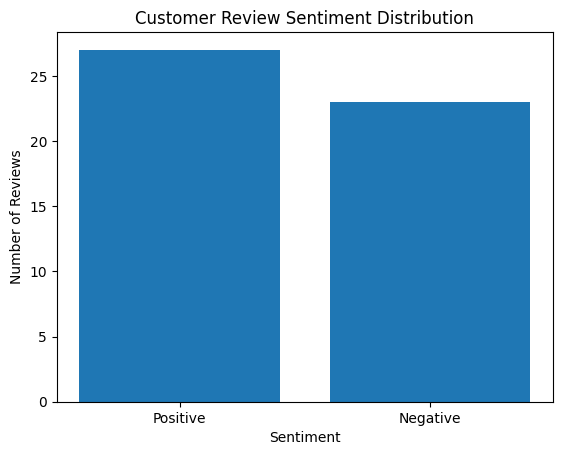

In [8]:
labels = ["Positive", "Negative"]
counts = [positive, negative]

plt.bar(labels, counts)
plt.title("Customer Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()